In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('Data/Suicide_Detection.csv')
print(data.head())

print()

   Unnamed: 0                                               text        class
0           2  Ex Wife Threatening SuicideRecently I left my ...      suicide
1           3  Am I weird I don't get affected by compliments...  non-suicide
2           4  Finally 2020 is almost over... So I can never ...  non-suicide
3           8          i need helpjust help me im crying so hard      suicide
4           9  I’m so lostHello, my name is Adam (16) and I’v...      suicide



In [6]:
print(f"Data shape {data.shape}")

print(f"Number of Unique Elements: {len(data['text'].unique())}")

Data shape (232074, 3)
Number of Unique Elements: 232074


In [16]:
from sklearn.model_selection import train_test_split

X = data.drop(labels=['class', 'Unnamed: 0' ], axis=1)
y = data['class']

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=None, shuffle=True)


In [17]:
#print(x_train.shape)

(174055, 1)


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(x_train['text'])

print(x_train_counts.shape)

#print(f"vocab => {count_vect.vocabulary_.get(u'disaster')}")

(174055, 142741)


In [22]:
#print(x_train_counts)

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
X_train_tfidf.shape


(174055, 142741)

In [26]:
print(X_train_tfidf)

  (0, 139409)	0.11757710549557505
  (0, 137983)	0.10306793964023
  (0, 137897)	0.11903675353349906
  (0, 137004)	0.04873706475628796
  (0, 136693)	0.1280932581579662
  (0, 136016)	0.12231716931001205
  (0, 135416)	0.10311393857795798
  (0, 134807)	0.10037012589802234
  (0, 134776)	0.21774980154707704
  (0, 134611)	0.08759789968309466
  (0, 134600)	0.05263432726764409
  (0, 125968)	0.0636509503489907
  (0, 124405)	0.08951856425462797
  (0, 124302)	0.06356511789995073
  (0, 123540)	0.0703217435447531
  (0, 123456)	0.1281959515182358
  (0, 123177)	0.1367835247076321
  (0, 122447)	0.12940772709907788
  (0, 119855)	0.08830902045603449
  (0, 118685)	0.1815960159164319
  (0, 117541)	0.18229612843097517
  (0, 115563)	0.3039365276269847
  (0, 114956)	0.04506270037897508
  (0, 114017)	0.09551407797000869
  (0, 113237)	0.08069247952281731
  :	:
  (174053, 60820)	0.10518281496791429
  (174053, 58817)	0.15548369810518248
  (174053, 55665)	0.14061518845335785
  (174053, 55256)	0.11025709941998513
  

In [28]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [29]:
docs_new = ['I wanna kill myself', 'I love KFC']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print(f'{doc} -> {category}')

I wanna kill myself -> suicide
I love KFC -> non-suicide


In [30]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

text_clf.fit(x_train['text'], y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
def print_confusion_matrix(model,
                           confusion_matrix,
                           figsize = (8,8),
                           fontsize=12,
                           ylabel='True label',
                           xlabel='Predicted label'):


    class_names = model.classes_
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)


accuracy:-> 0.8836932728933625
              precision    recall  f1-score   support

 non-suicide       0.97      0.79      0.87     28965
     suicide       0.82      0.98      0.89     29054

    accuracy                           0.88     58019
   macro avg       0.90      0.88      0.88     58019
weighted avg       0.90      0.88      0.88     58019



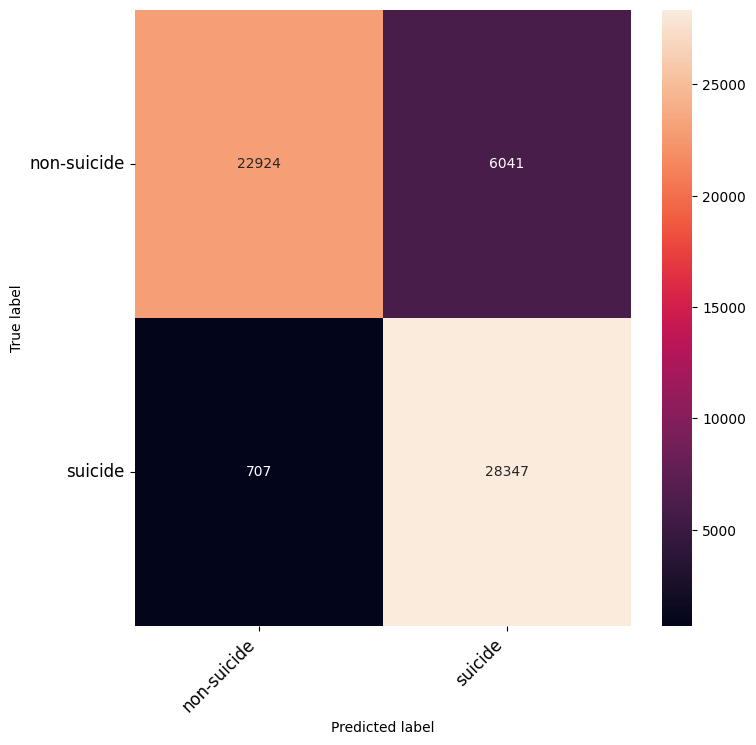

In [32]:
print(f"accuracy:-> {text_clf.score(x_test['text'],y_test)}")


from sklearn import metrics

docs_test = x_test['text']
predicted = text_clf.predict(docs_test)

print(metrics.classification_report(y_test, predicted ))

cm = metrics.confusion_matrix(y_test, predicted, labels=text_clf.classes_)

print_confusion_matrix(text_clf,confusion_matrix=cm)

In [33]:
from sklearn.linear_model import SGDClassifier
text_clf2 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=.0001, random_state=42,
                          max_iter=5, tol=None)),
])

text_clf2



Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(max_iter=5, random_state=42, tol=None))])

accuracy:-> 0.9305399955187094
              precision    recall  f1-score   support

 non-suicide       0.92      0.95      0.93     28965
     suicide       0.94      0.92      0.93     29054

    accuracy                           0.93     58019
   macro avg       0.93      0.93      0.93     58019
weighted avg       0.93      0.93      0.93     58019



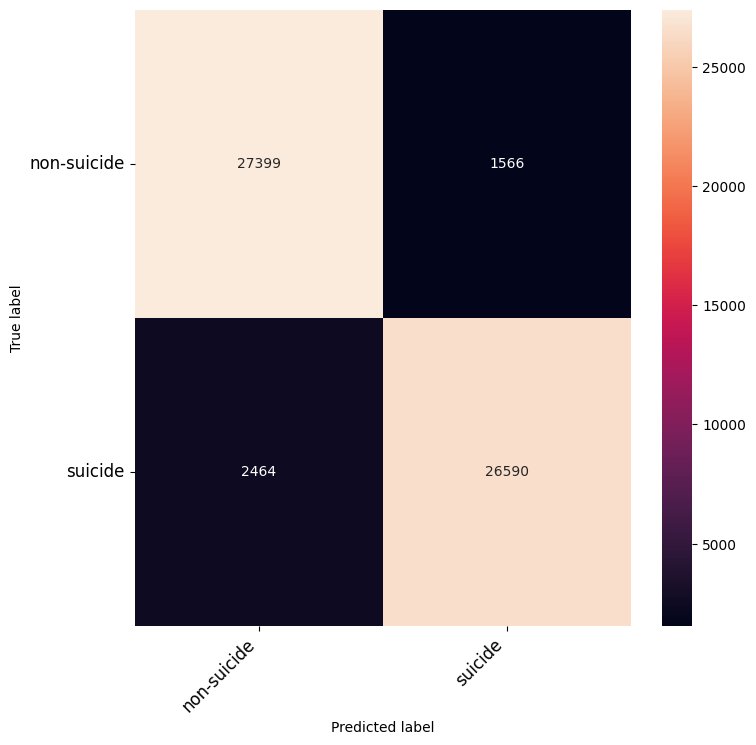

In [34]:
text_clf2.fit(x_train['text'], y_train)

predicted = text_clf2.predict(docs_test)
print (f"accuracy:-> {text_clf2.score(x_test['text'],y_test)}")


print(metrics.classification_report(y_test, predicted ))


cm = metrics.confusion_matrix(y_test, predicted, labels=text_clf2.classes_)

print_confusion_matrix(text_clf2,confusion_matrix=cm)

In [35]:
best_model = text_clf2

In [36]:
import joblib

filename = 'finalized_model.sav'
joblib.dump(best_model, filename)

['finalized_model.sav']

In [37]:
loaded_model=joblib.load(filename)

In [38]:
post_data=["i have no reason to live anymore",
           "I passed my driver's permit test today",
           "I feel like I'm at my end.",
           "I'm tired of convincing myself that i want to be alive every day.",
           "We first got together freshman year",]

In [ ]:
post_data

In [ ]:
hits=0
res=loaded_model.predict(post_data)
for i in range(len(res)):
    if res[i]=="non-suicide":
        res[i]=0
    else:
        res[i]=1
res=list(map(int,res))
if sum(res)/len(res)>0.4:
    print("Person is in Depression")
else:
    print("Normal")